In [2]:
from nas.nas import NAS
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings

warnings.filterwarnings("ignore")

SEED = 42

[WARNING 05-07 12:22:40] ax.service.utils.with_db_settings_base: Ax currently requires a sqlalchemy version below 2.0. This will be addressed in a future release. Disabling SQL storage in Ax for now, if you would like to use SQL storage please install Ax with mysql extras via `pip install ax-platform[mysql]`.


In [3]:
DATA_PATH = "/Users/camille.hascoet/Documents/greenai/src/hale/sandbox/data/tracks.csv"


def get_data(path: str = DATA_PATH):
    df = pd.read_csv(path)
    X = df.drop(
        ["popularity", "id", "name", "artists", "id_artists", "release_date"], axis=1
    )
    y = df["popularity"]
    X_drop = X.drop(
        ["mode", "valence", "key", "duration_ms", "speechiness", "liveness"], axis=1
    )
    X.drop = X.drop(
        [
            "loudness",
            "energy",
            "explicit",
            "acousticness",
            "instrumentalness",
            "danceability",
        ],
        axis=1,
    )

    X_scaler = StandardScaler()
    X_scaled = X_scaler.fit_transform(X_drop)
    y_scaled = y.values.reshape(-1, 1) / 100

    X_shuffled, y_shuffled = shuffle(X_scaled, y_scaled, random_state=SEED)

    X_train = X_shuffled[:25000]
    y_train = y_shuffled[:25000]

    print(y_train.mean(), y_scaled.mean())

    return X_train, y_train

In [4]:
X, y = get_data()

0.2761744 0.2757005277224752


In [5]:
test_nas = NAS(
    search_spaces_names=["small_nn", "mlp", "dt", "knn", "svr", "lr", "xgb", "rf"],
    X=X,
    y=y,
    num_trials=64,
    metrics=["mae", "inference_emissions", "train_emissions"],
)

Using default search space for small_nn
Using default search space for mlp
Using default search space for dt
Using default search space for knn
Using default search space for svr
Using default search space for lr
Using default search space for xgb
Using default search space for rf


In [6]:
test_nas.run_nas()

Running NAS for small_nn


[INFO 05-07 12:22:46] ax.modelbridge.dispatch_utils: Using Models.BOTORCH_MODULAR since there is at least one ordered parameter and there are no unordered categorical parameters.
[INFO 05-07 12:22:46] ax.modelbridge.dispatch_utils: Calculating the number of remaining initialization trials based on num_initialization_trials=None max_initialization_trials=None num_tunable_parameters=4 num_trials=8 use_batch_trials=False
[INFO 05-07 12:22:46] ax.modelbridge.dispatch_utils: calculated num_initialization_trials=5
[INFO 05-07 12:22:46] ax.modelbridge.dispatch_utils: num_completed_initialization_trials=0 num_remaining_initialization_trials=5
[INFO 05-07 12:22:46] ax.modelbridge.dispatch_utils: `verbose`, `disable_progbar`, and `jit_compile` are not yet supported when using `choose_generation_strategy` with ModularBoTorchModel, dropping these arguments.
[INFO 05-07 12:22:46] ax.modelbridge.dispatch_utils: Using Bayesian Optimization generation strategy: GenerationStrategy(name='Sobol+BoTorch',

[INFO 05-07 12:22:46] Scheduler: Running trials [0]...
[INFO 05-07 12:22:47] Scheduler: Running trials [1]...
[INFO 05-07 12:22:47] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:22:47] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:22:48] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:22:48] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:22:49] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:22:49] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:22:51] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:22:51] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:22:55] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:22:55] Scheduler: Waiting for completed trials (for 5 sec, cur

Running NAS for mlp


[INFO 05-07 12:26:58] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:26:58] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:26:59] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:26:59] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:27:00] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:27:00] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:27:03] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:27:03] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:27:06] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:27:06] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:27:11] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for dt


[INFO 05-07 12:30:22] Scheduler: Running trials [1]...
[INFO 05-07 12:30:23] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:30:23] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:30:24] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:30:24] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:30:26] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:30:26] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:30:28] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:30:28] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:30:31] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:30:31] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:30:37] Schedu

Running NAS for knn


[INFO 05-07 12:32:59] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:32:59] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:33:00] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:33:00] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:33:03] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:33:03] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:33:06] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:33:06] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:33:11] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:33:11] Scheduler: Waiting for completed trials (for 7 sec, currently running trials: 2).
[INFO 05-07 12:33:19] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for svr


[INFO 05-07 12:36:46] Scheduler: Running trials [1]...
[INFO 05-07 12:36:47] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:36:47] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:36:48] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:36:48] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:36:50] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:36:50] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:36:52] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:36:52] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:36:56] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:36:56] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:37:01] Schedu

Running NAS for lr


[INFO 05-07 12:41:42] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:41:42] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:41:43] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:41:43] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:41:44] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:41:44] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:41:47] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:41:47] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:41:50] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:41:50] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:41:55] Scheduler: Fetching data for newly completed trials: [].
[INF

Running NAS for xgb


[INFO 05-07 12:42:34] Scheduler: Running trials [1]...
[INFO 05-07 12:42:34] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:42:34] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:42:35] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:42:35] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:42:36] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:42:36] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:42:38] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:42:38] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:42:42] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:42:42] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:42:47] Schedu

Running NAS for rf


[INFO 05-07 12:45:47] Scheduler: Running trials [1]...
[INFO 05-07 12:45:47] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:45:47] Scheduler: Waiting for completed trials (for 1 sec, currently running trials: 2).
[INFO 05-07 12:45:48] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:45:48] Scheduler: Waiting for completed trials (for 1.5 sec, currently running trials: 2).
[INFO 05-07 12:45:50] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:45:50] Scheduler: Waiting for completed trials (for 2 sec, currently running trials: 2).
[INFO 05-07 12:45:52] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:45:52] Scheduler: Waiting for completed trials (for 3 sec, currently running trials: 2).
[INFO 05-07 12:45:56] Scheduler: Fetching data for newly completed trials: [].
[INFO 05-07 12:45:56] Scheduler: Waiting for completed trials (for 5 sec, currently running trials: 2).
[INFO 05-07 12:46:01] Schedu

In [7]:
test_nas.exp_to_df(name="small_nn")

[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


trial_index arm_name trial_status generation_method  inference_emissions  \
0            0      0_0    COMPLETED             Sobol         6.282769e-09   
1            1      1_0    COMPLETED             Sobol         9.879474e-09   
2            2      2_0    COMPLETED             Sobol         1.227300e-08   
3            3      3_0    COMPLETED             Sobol         8.070895e-09   
4            4      4_0    COMPLETED             Sobol         1.478769e-08   
5            5      5_0    COMPLETED           BoTorch         1.380335e-08   
6            6      6_0    COMPLETED           BoTorch         1.063281e-08   
7            7      7_0    COMPLETED           BoTorch         6.232637e-09   

        mae  train_emissions  hidden_size_1  hidden_size_2  learning_rate  \
0  0.126494         0.004571             27             23       0.015759   
1  0.153479         0.004448             94             33       0.070136   
2  0.134184         0.005685             98             51       0.012939   
3  0.154022         0.005528             60             41       0.087747   
4  0.153933         0.006260             92             79       0.072737   
5  0.153742         0.006222            100            100       0.081777   
6  0.132694         0.007151             47             10       0.011997   
7  0.127692         0.005609             12             12       0.013729   

    dropout       script  
0  0.105241  small_nn.py  
1  0.221677  small_nn.py  
2  0.147119  small_nn.py  
3  0.163481  small_nn.py  
4  0.078414  small_nn.py  
5  0.006479  small_nn.py  
6  0.161144  small_nn.py  
7  0.015627  small_nn.py

[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:41] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


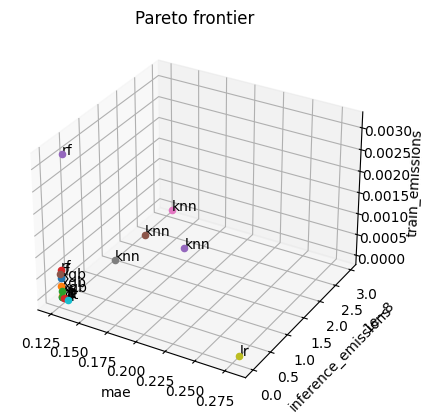

[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


{'small_nn': [{'x': 0.1264939159154892, 'y': 6.282768971743735e-09, 'z': 0.004571191966533661, 'pareto': False}, {'x': 0.153478741645813, 'y': 9.879474127671983e-09, 'z': 0.004448059014976025, 'pareto': False}, {'x': 0.13418397307395935, 'y': 1.2272995064677161e-08, 'z': 0.005684567149728537, 'pareto': False}, {'x': 0.15402181446552277, 'y': 8.070895063383432e-09, 'z': 0.005528466776013374, 'pareto': False}, {'x': 0.15393298864364624, 'y': 1.4787685742589929e-08, 'z': 0.006259523797780275, 'pareto': False}, {'x': 0.15374164283275604, 'y': 1.380334779810255e-08, 'z': 0.006222037132829428, 'pareto': False}, {'x': 0.13269364833831787, 'y': 1.0632808411514816e-08, 'z': 0.007151162251830101, 'pareto': False}, {'x': 0.12769249081611633, 'y': 6.232637073111391e-09, 'z': 0.005608887877315283, 'pareto': False}], 'mlp': [{'x': 0.13171415030956268, 'y': 5.262168478736839e-10, 'z': 0.000608358415775001, 'pareto': False}, {'x': 0.13404721021652222, 'y': 1.7472952251740281e-10, 'z': 0.00054729677503

In [8]:
test_nas.plot_pareto()

print(test_nas.get_pareto_dict())

[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 12:48:42] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


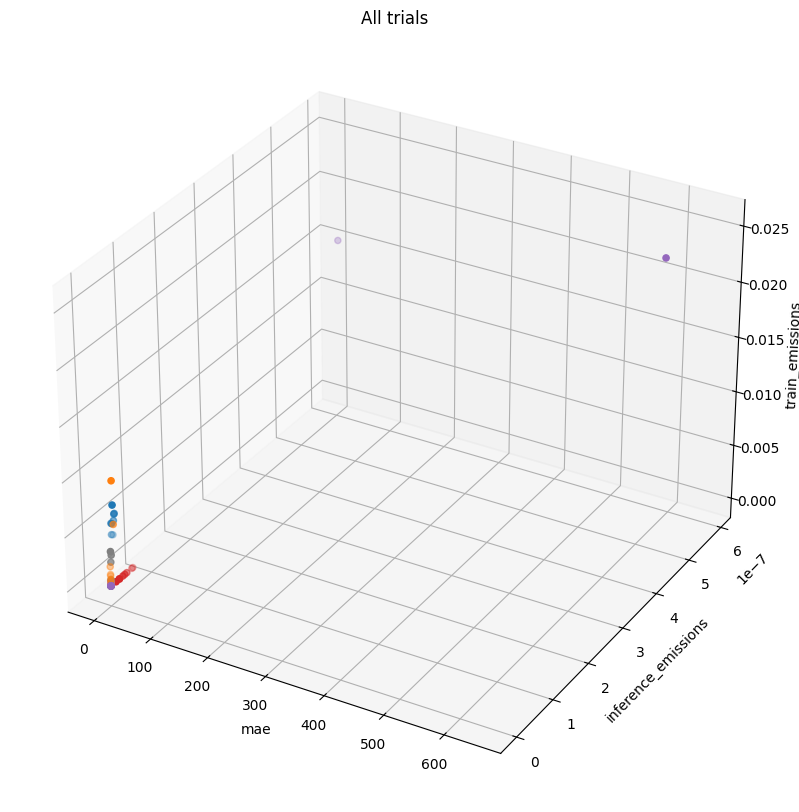

In [9]:
test_nas.plot_all_trials()

In [10]:
test_nas.remove_tmp_files()

In [12]:
param_dict = test_nas.get_pareto_points_params()
# print keys
print(param_dict)

# param_dict to df
df = pd.DataFrame(param_dict)
print(df)

[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.
[WARNING 05-07 13:35:47] ax.service.utils.report_utils: Column reason missing for all trials. Not appending column.


{'dt_0': trial_index                       0
arm_name                        0_0
trial_status              COMPLETED
generation_method             Sobol
inference_emissions             0.0
mae                        0.127865
train_emissions            0.000037
max_depth                         5
min_samples_split                 5
criterion              friedman_mse
script                        dt.py
Name: 0, dtype: object, 'dt_1': trial_index                    1
arm_name                     1_0
trial_status           COMPLETED
generation_method          Sobol
inference_emissions          0.0
mae                     0.127495
train_emissions          0.00005
max_depth                      7
min_samples_split              6
criterion                poisson
script                     dt.py
Name: 1, dtype: object, 'dt_2': trial_index                    2
arm_name                     2_0
trial_status           COMPLETED
generation_method          Sobol
inference_emissions          0.0
mae

In [13]:
print(df)

                             dt_0       dt_1       dt_2          dt_3  \
algorithm                     NaN        NaN        NaN           NaN   
arm_name                      0_0        1_0        2_0           3_0   
criterion            friedman_mse    poisson    poisson  friedman_mse   
fit_intercept                 NaN        NaN        NaN           NaN   
generation_method           Sobol      Sobol      Sobol         Sobol   
inference_emissions           0.0        0.0        0.0           0.0   
learning_rate                 NaN        NaN        NaN           NaN   
mae                      0.127865   0.127495   0.128202      0.129701   
max_depth                       5          7          5             3   
min_samples_split               5          6          9             2   
n_estimators                  NaN        NaN        NaN           NaN   
n_neighbors                   NaN        NaN        NaN           NaN   
script                      dt.py      dt.py      d